In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\intel\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
## Importing the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


### Merge train and test datasets

### Difference between merge and append ---> merge adds the dataset horizontally(different columns), append adds the dataset in bottom(in same columns data will be stored)


### pd.concat and df.append performs in same way

In [5]:
df = pd.concat([df_train, df_test])

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Dropping the User_ID column as it is not required

In [9]:
df.drop(columns=['User_ID'], axis=1, inplace=True)

In [10]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

### Data preprocessing

In [12]:
### Handeling categorical feature ----> "Gender"
df['Gender']=df['Gender'].map({'F': 0, 'M': 1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
### Handeling categorical feature ----> "Age"
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
### We are using lable encoder this time

# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# df['Age'] = label_encoder.fit_transform(df['Age'])

### ---> We are avoiding this process as we know for test data we have to use only "transform" not fit-transform, and here test and train data are together.

In [15]:
df['Age']=df['Age'].map({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
### Handeling categorical feature ----> "City_Category"
df_city = pd.get_dummies(df['City_Category'], drop_first=True)
df_city = df_city.astype(int)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [17]:
df = pd.concat([df, df_city], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
## Dropping the "City_Category" feature now
df.drop(columns=['City_Category'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 71.7+ MB


In [20]:
## Checking missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [21]:
## Dropping the Product_ID column as it is not needed
df.drop(columns=['Product_ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


### "Purchase" is having null values as test data is there as well, so we will trying to delete the null values only from the product category features

In [22]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [23]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

### This is a discrete continuous feature, as it is repeating the values. So, we will replace the null values by it's mode values.

### We are not using mean because, mean will create a new category all together


In [24]:
df['Product_Category_2'].mode()[0]

8.0

In [25]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [26]:
df['Product_Category_2'].isnull().sum()

0

In [27]:
### Product_Category_3 null value replacing
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [28]:
df['Product_Category_3'].isnull().sum()

0

In [29]:
### Handleing categorical feature -----> 'Stay_In_Current_City_Years'
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [32]:
### Converting the data type os 'Stay_In_Current_City_Years', as we are having already the integer values 
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


### Visualization

<Axes: xlabel='Age', ylabel='Purchase'>

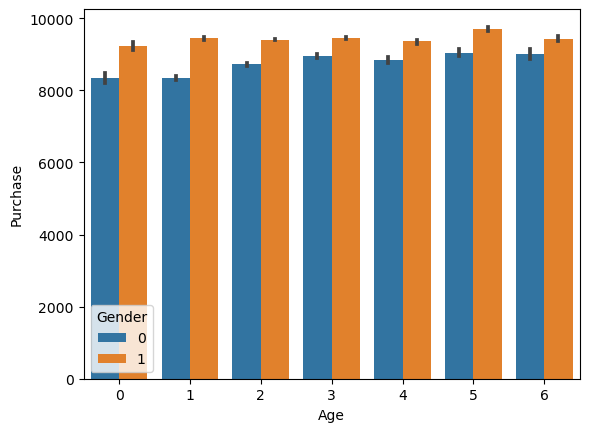

In [34]:
### Age vs Purchase barplot
sns.barplot(x='Age', y='Purchase', data=df, hue='Gender')

## F->0, M->1

### Observartion
1. Male have purcased more products than female.
2. The most purchased age category is -> 51-55

<Axes: xlabel='Occupation', ylabel='Purchase'>

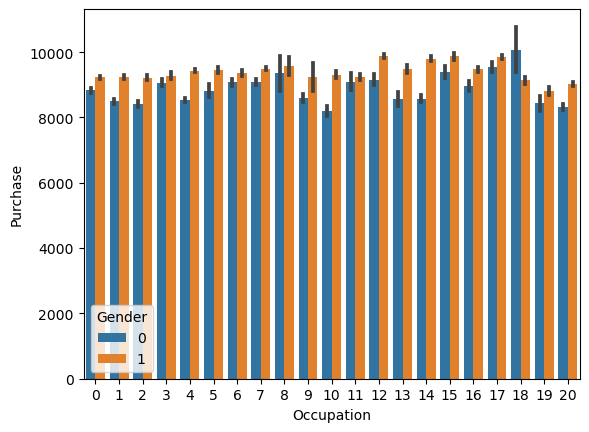

In [35]:
### Visualization of purchase with occupation
sns.barplot(x='Occupation', y='Purchase', data=df, hue='Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

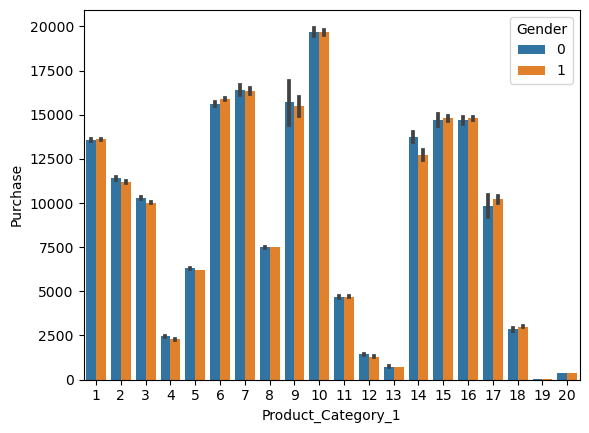

In [36]:
### Visualization of purchase with Product_Category_1
sns.barplot(x='Product_Category_1', y='Purchase', data=df, hue='Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

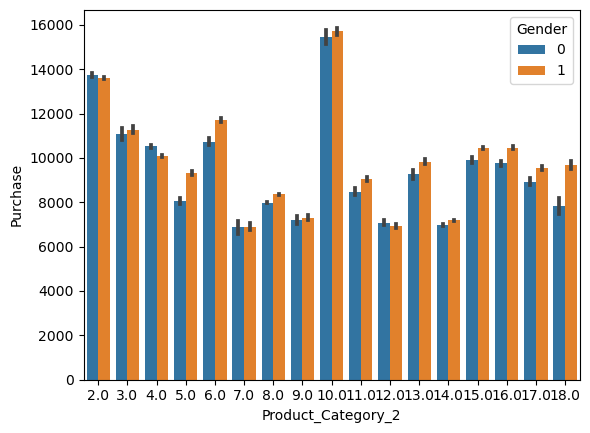

In [37]:
### Visualization of purchase with Product_Category_2
sns.barplot(x='Product_Category_2', y='Purchase', data=df, hue='Gender')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

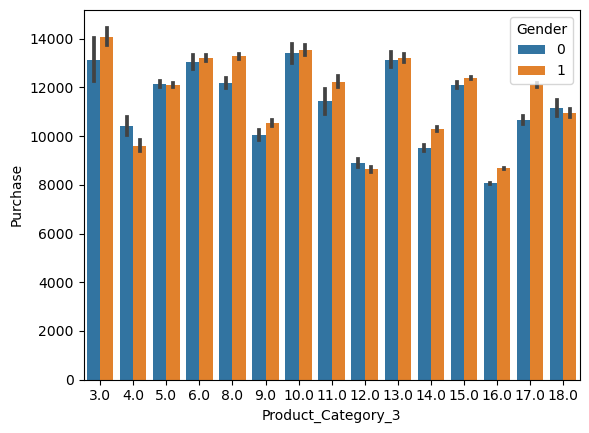

In [38]:
### Visualization of purchase with Product_Category_3
sns.barplot(x='Product_Category_3', y='Purchase', data=df, hue='Gender')

### Observation
Product_Category_1 has been bought in highest amount than other two products

### Making train and test data

In [39]:
df_test = df[df['Purchase'].isnull()]

df_train = df[~df['Purchase'].isnull()]

## Feature scaling

In [42]:
df_train.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0


In [43]:
X = df_train.drop(columns=['Purchase'], axis=1)
y = df_train['Purchase']

In [46]:
### train-test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

model = rfr.fit(X_train, y_train)

In [50]:
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [53]:
score

0.6294528202442147